In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats

## Error Visible Calculation

In [12]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

## Input Data

In [2]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_case')
test_labels = test_features.pop('new_case')
X = train_features.to_numpy()
Y = train_labels.to_numpy()
test_X = test_features.to_numpy()
test_Y = test_labels.to_numpy()
input_shape = (12,)

In [3]:
train_features.head()

,yesterday_new_cas,first_case_time,date,case,population,stay_at_home,50_gatherings,500_gatherings,public_schools,restaurant,entertainment/gym,Federal_guidelines,foreign_travel_ban
0,1,123,198,98,42831,0,0,0,1,1,1,1,1
1,0,124,186,7,7110,0,1,1,1,1,1,1,1
2,89,107,266,10752,311522,1,1,1,1,1,1,1,1
3,1,114,199,85,55101,1,1,1,1,1,1,1,1
4,0,110,121,13,42950,0,0,0,0,1,1,1,1


# MLP

In [4]:
model = Sequential()
model.add(BatchNormalization(input_dim=X.shape[1]))
model.add(Dense(24,activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(36,activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(48,activation="tanh"))
#model.add(BatchNormalization())
model.add(Dense(16,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(5,activation="relu"))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 24)                336       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 36)                900       
_________________________________________________________________
batch_normalization_2 (Batch (None, 36)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 48)                1776      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                7

In [5]:
opt = keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(loss='MSE', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X, Y, epochs=200, batch_size=3000, verbose=1, validation_split=0.1,callbacks=[early_stopping])
model.summary()

Epoch 1/200
120/120 [==============================] - 1s 6ms/step - loss: 4955.4761 - mean_squared_error: 4955.4761 - val_loss: 5005.9102 - val_mean_squared_error: 5005.9102
Epoch 2/200
120/120 [==============================] - 1s 4ms/step - loss: 4211.7153 - mean_squared_error: 4211.7153 - val_loss: 4196.9678 - val_mean_squared_error: 4196.9678
Epoch 3/200
120/120 [==============================] - 0s 4ms/step - loss: 3499.4995 - mean_squared_error: 3499.4995 - val_loss: 3628.4099 - val_mean_squared_error: 3628.4104
Epoch 4/200
120/120 [==============================] - 1s 4ms/step - loss: 2940.4736 - mean_squared_error: 2940.4736 - val_loss: 3021.7336 - val_mean_squared_error: 3021.7336
Epoch 5/200
120/120 [==============================] - 1s 4ms/step - loss: 2552.0833 - mean_squared_error: 2552.0833 - val_loss: 2595.6963 - val_mean_squared_error: 2595.6963
Epoch 6/200
120/120 [==============================] - 1s 4ms/step - loss: 2287.3489 - mean_squared_error: 2287.3489 - val_lo

In [6]:
predict = model.predict(X)
r2_score(Y,predict)

0.7012581162724907

In [7]:
r2_score(test_Y,model.predict(test_X))

0.7894201972709979

In [10]:
mean_squared_error(test_Y,model.predict(test_X))

922.7460394127767

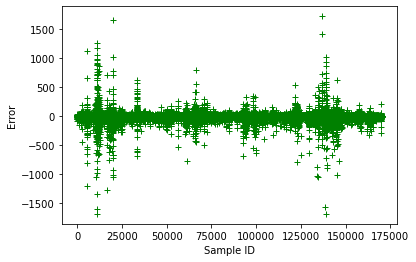

DescribeResult(nobs=170144, minmax=(array([1.3828278e-05], dtype=float32), array([1724.9346], dtype=float32)), mean=array([7.048414], dtype=float32), variance=array([873.07104], dtype=float32), skewness=array([22.151196], dtype=float32), kurtosis=array([779.2216], dtype=float32))

In [13]:
test_predict = model.predict(test_features)

error,abserror = errorCalculate(test_Y,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [14]:
model.save('mlp')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mlp\assets
